# k-Nearest-Neighbors: kNN-classifier

## kNN-classifier on iris-data set

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Load data and data inspection

In [2]:
# Load labeled data as a DataFrame
iris_data_raw = load_iris(as_frame=True)['frame']
# Load list of names of targets
iris_names = load_iris()['target_names']

# Create tweak function, to tweak raw DataFrame
def tweak_iris(df_):
    return df_.rename(columns=lambda s:s.replace(' ', '_') #remove white space for attribute access
                                        .replace('_(cm)', '')) #remove unit informataion

In [3]:
# Use tweak function to tidy up DataFrame
iris_data = tweak_iris(iris_data_raw)
# Check for missing data; Result: no missing data
iris_data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
target          False
dtype: bool

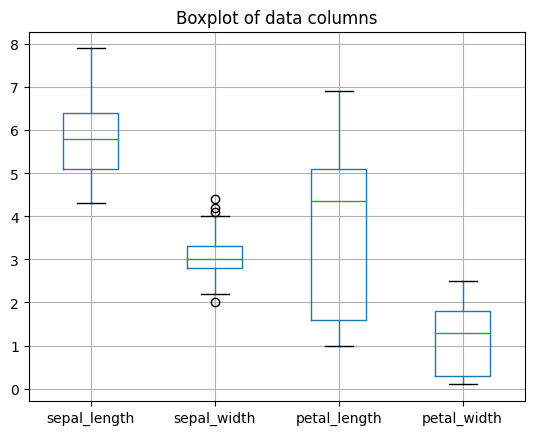

In [4]:
# Check data columns for outliers, Result: No problem with outliers
iris_data.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title('Boxplot of data columns')
plt.show()

In [5]:
def norm_iris(df_):
    '''Function normalizes first four columns of passed DataFrame to interval [0, 1].
    It returns minimum and maximum values of columns stored in a DataFrame, as well as
    the normalized DataFrame.'''
    # collect names of columns in order to keep them
    columns = list(df_.columns)[:4]
    # store all min and max of these columns in a DataFrame
    df_extrema = pd.DataFrame({'minimum': df_.min()[:4],
                               'maximum': df_.max()[:4]})
    return (df_extrema, 
            df_.assign(**{columns[i]: (df_.iloc[:, i] - df_extrema.iloc[i].minimum)/
                          (df_extrema.iloc[i].maximum - df_extrema.iloc[i].minimum) for i in range(4)}))

# Normalize iris data_set
_, iris_data = norm_iris(iris_data)

In [94]:
# Create train and test data set
[list_train_dataset, list_test_dataset] = train_test_split(iris_data, test_size=0.25)
# Create DataFrames of train and test data
train_dataset = pd.DataFrame(list_train_dataset).reset_index(drop=True)
test_dataset = pd.DataFrame(list_test_dataset).reset_index(drop=True)

### kNN-Classification

In [95]:
# Create instance of classifier
kNN_classifier = KNeighborsClassifier(n_neighbors=6)
# Fit classifier to training data
kNN_classifier.fit(X=train_dataset.iloc[:, :4], y=train_dataset.iloc[:, 4])
# Calculate predictions on test data set and create columnd stating if prediction is correct
test_dataset = test_dataset.assign(predict_target=kNN_classifier.predict(X=test_dataset.iloc[:, :4]),
                                   predict_correct=lambda s: s.predict_target==s.target) 
# Evaluate how good classification worked
print(f'Percentage of correct classifications:\t{test_dataset.predict_correct.mean():.1%}')

Percentage of correct classifications:	94.7%


### Estimate best choice of k

In [96]:
# List to store accuracies of classification in
kNN_acc_list = []
# Loop through values of k and observe maximum of accuracy of kNN-classifier
for k in range(1, 21):
    # Iinitialize instance of classifier with k of this loop
    kNN = KNeighborsClassifier(n_neighbors=k)
    # initialize variable to sum accuracy for different train/test_splits
    acc = 0
    # number of train/test_split choices evaluated for every k
    no_splits = 200
    for i in range(no_splits):
        # Chosse train/test_split for this iteration
        [X_train, X_test, y_train, y_test] = train_test_split(iris_data.iloc[:, :4], iris_data.iloc[:, 4], 
                                                    test_size=0.25, random_state=i)
        # Fit model with this choice 
        kNN.fit(X=X_train, y=y_train)
        # sum accuracy of evaluation with test data to variable
        acc += accuracy_score(y_true=y_test, y_pred=kNN.predict(X=X_test))
    # Append mean of accuracy seen for different train/test_splits
    kNN_acc_list.append([k, acc/no_splits])

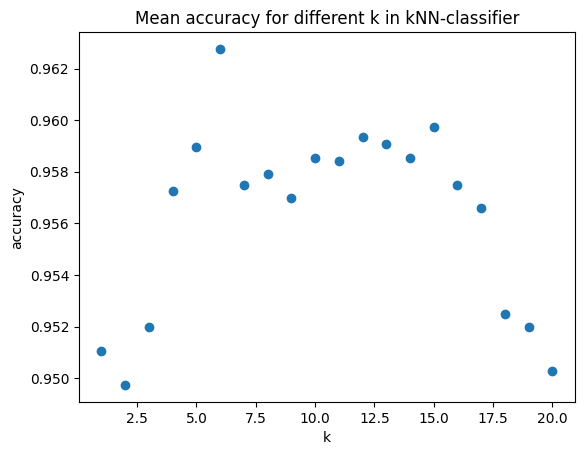

In [86]:
# Plot result
kNN_acc = pd.DataFrame(kNN_acc_list, columns=['k', 'accuracy'])
fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.set_title('Mean accuracy for different k in kNN-classifier')
ax.scatter(kNN_acc.k, kNN_acc.accuracy)
plt.show()

As a result k=6 is chosen as optimal